<a href="https://colab.research.google.com/github/sdsc-bw/DataFactory/blob/develop/finetuning/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finetuning

To find a suitable model for your ML problem is very important. Not every model has the same performane on every task. Some models can be to simple (underfitting) and some models can be to complex for for a problem (overfitting). Also a model has different hyperparameters which also have an impact on the performance. Therefor exist libraries that can be used to find a appropriate model and its hyperparameters. Popular ones are [auto-sklearn](https://github.com/automl/auto-sklearn) and [hyperopt](https://github.com/hyperopt/hyperopt).

## Import packages

In [1]:
root = '../'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine, load_digits

import sys
sys.path.insert(0, root + "codes")
from DataFactory import DataFactory

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Load dataset: MNIST digit dataset

In [4]:
X, y = load_digits(return_X_y=True)

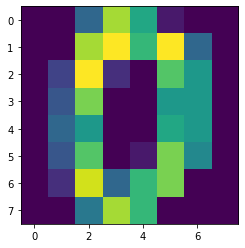

In [5]:
plt.imshow(X[0].reshape(8, 8))
plt.show()

## Load dataset: wine dataset

The third dataset is the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) from sklearn. It contains the follwing information:
- 13 features
- 3 classes

In [6]:
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['class'] = pd.Series(data.target)

In [7]:
# needs no prepocessing
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Use DataFactory

In [8]:
datafactory = DataFactory()

### Auto-sklearn

Auto-sklearn requires a linux OS (otherwise it can be run on colab). It is an automated machine learning toolkit using sklearn models. It automatically trains different ML models with different hyperparameters. At the end it selects the best model. In the DataFactory you can use it like that:

In [9]:
#model, score = datafactory.finetune(X, y, strategy='auto_sklearn', mtype='C')

### Sklearn with Search

Sklearn also provides functions to tune the hyperparameters for a specific model. We implemented a function to also find the best model:

In [10]:
# list with models to try out
models = ['decision_tree', 'random_forest', 'adaboost']
# list with params for every model to try out (search strategy of hyperparameters should be in ['grid', 'random'])
params = [{'strategy': 'random'}, {'strategy': 'random'}, {'strategy': 'random'}]

In [11]:
model, score = datafactory.finetune(X, y, strategy='sklearn', models=models, cv=3, mtype='C', params=params)

2021-11-16 16:48:24,630 - DataFactory - INFO - Start finetuning...
2021-11-16 16:48:24,633 - DataFactory - INFO - Start search for best parameters of: decision_tree...
2021-11-16 16:48:32,086 - DataFactory - INFO - ...End search
2021-11-16 16:48:32,087 - DataFactory - INFO - Best parameters are: {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'entropy'} with score 0.88
2021-11-16 16:48:32,088 - DataFactory - INFO - Start search for best parameters of: random_forest...
2021-11-16 16:48:41,853 - DataFactory - INFO - ...End search
2021-11-16 16:48:41,854 - DataFactory - INFO - Best parameters are: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50} with score 0.98
2021-11-16 16:48:41,855 - DataFactory - INFO - Start search for best parameters of: adaboost...
2021-11-16 16:49:00,943 - DataFactory - INFO - ...End search
2021-11-16 16:49:00,944 - DataFactory - INFO - Best parameters are: {'n_estimators': 200, 'learning_rate': 0.0

In [12]:
score

0.9755994975584714